## Yashvi's non-parabolic $\chi^2$

In [1]:
from MP_classes_lkl_prof_functions import *

### Yashvi's runs

In [2]:
yashvi = lkl_prof('/home2/karwal/lkl_prof/Yashvi_non_parabolic_chi2/', 'planck_fede', 'fraction_axion_ac')
rerun = lkl_prof('/home2/karwal/lkl_prof/Yashvi_non_parabolic_chi2/planck_fede/', 'planck_fede', 'fraction_axion_ac')
# if you don't have MCMC chains, ensure that the info_root (the second argument) is the same as the folder name, as shown in this example.
# also ensure that the .bestfit and .covmat files you have are named <info_root>.bestfit and <info_root>.covmat

In [3]:
yashvi.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
yashvi.prof_max = 0.14
yashvi.prof_min = 0.01
yashvi.processes = 1

rerun.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
rerun.prof_max = 0.14
rerun.prof_min = 0.01
rerun.processes = 1

In [4]:
# lcdm.check_mcmc_chains(read_all_chains=False) # remove if no chains exist
# lcdm.check_mcmc_convergence(read_all_chains=False) # remove if no chains exist

In [5]:
yashvi.global_ML = get_MP_bf_dict(yashvi.chains_dir+'planck_fede/planck_fede.bestfit')
yashvi.param_order = read_header_as_list(yashvi.chains_dir+'planck_fede_+fraction_axion_ac_lkl_profile.txt')

check_global_min: Found minimum with file name planck_fede
match_param_names: Params match - the recorded params contain the same params as param_names passed. 


In [6]:
print("Global minimum:")
print(yashvi.global_ML)
print(rerun.global_ML)

Global minimum:
{0.02262609: 'omega_b', 0.1242533: 'omega_cdm', 0.6909933: 'h', 3.052278: 'ln10^{10}A_s', 0.9795191: 'n_s', 0.05539626: 'tau_reio', 2.931837: 'scf_parameters__1', 0.05202657: 'fraction_axion_ac', -3.795181: 'log10_axion_ac', 47.72671: 'A_cib_217', 0.3632496: 'xi_sz_cib', 7.272315: 'A_sz', 253.74: 'ps_A_100_100', 47.63453: 'ps_A_143_143', 46.82874: 'ps_A_143_217', 119.6834: 'ps_A_217_217', 0.007241073: 'ksz_norm', 8.960738: 'gal545_A_100', 11.16717: 'gal545_A_143', 19.81652: 'gal545_A_143_217', 94.93781: 'gal545_A_217', 0.1147175: 'galf_TE_A_100', 0.1353448: 'galf_TE_A_100_143', 0.4800059: 'galf_TE_A_100_217', 0.2251487: 'galf_TE_A_143', 0.6645263: 'galf_TE_A_143_217', 2.079834: 'galf_TE_A_217', 0.9997204: 'calib_100T', 0.9981926: 'calib_217T', 1.000103: 'A_planck', 0.8215245: 'sigma8', 0.3089679: 'Omega_m', 13.52566: 'age', 142.0351: 'rs_rec', 144.4779: 'rs_d', 12.50796: 'da_rec', 281.5191: 'tau_d', 276.1042: 'tau_rec', 1088.984: 'z_rec', 1.041811: '100*theta_s', 0.0520

In [7]:
yashvi_output = yashvi.full_lkl_prof_dict()
rerun_output = rerun.full_lkl_prof_dict()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
yashvi_x = yashvi_output['f_ede']
yashvi_y = yashvi_output['-logLike']

In [10]:
rerun_x = rerun_output['f_ede']
rerun_y = rerun_output['-logLike']

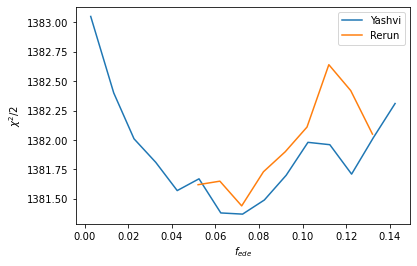

In [11]:
plt.plot(yashvi_x, yashvi_y, label="Yashvi")
plt.plot(rerun_x, rerun_y, label="Rerun")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
# plt.xlim([min(yashvi_x), max(yashvi_x)])
# plt.ylim([min(yashvi_x)-0.1, max(yashvi_x)])
plt.legend()
plt.show()

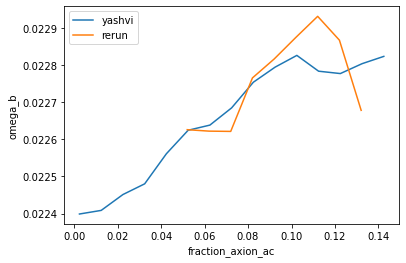

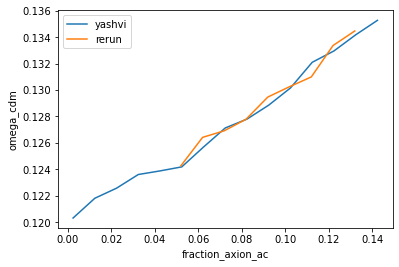

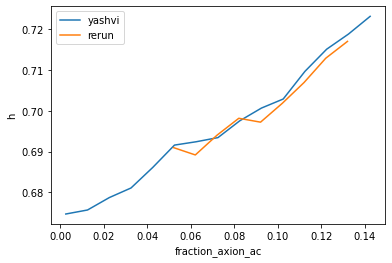

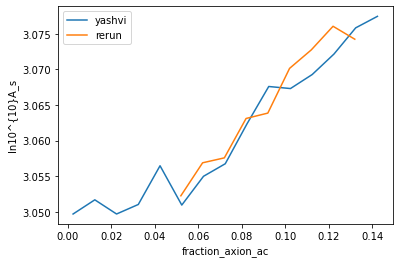

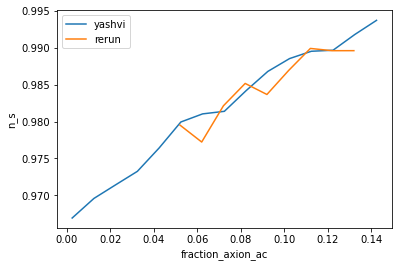

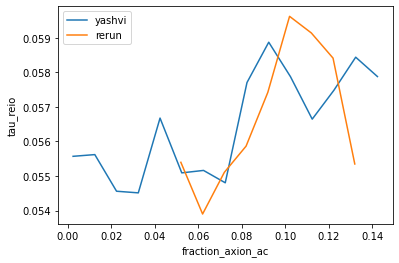

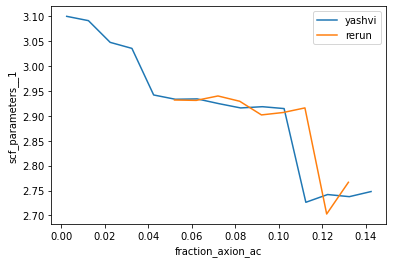

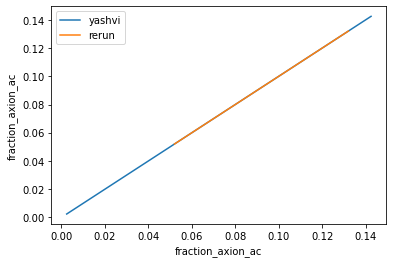

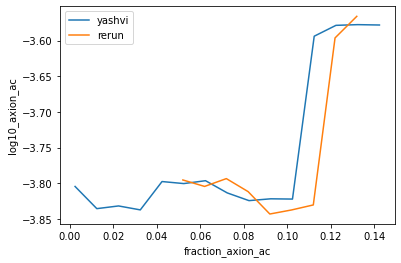

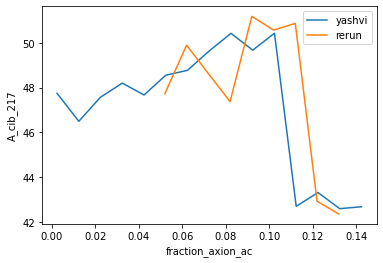

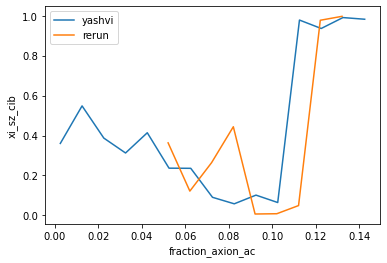

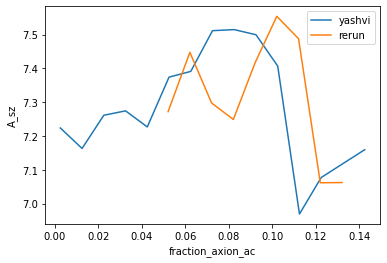

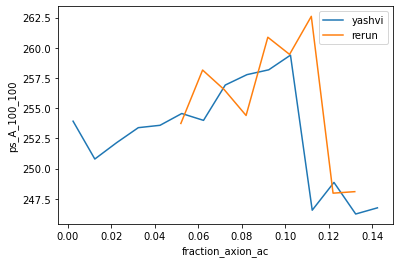

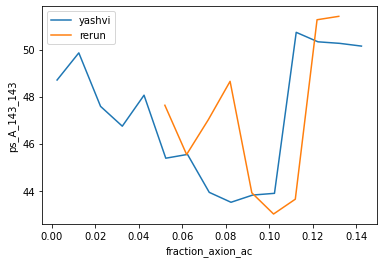

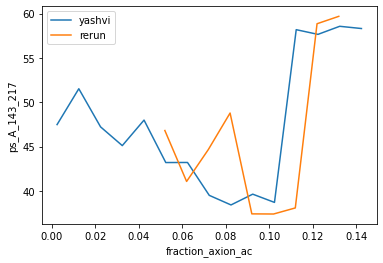

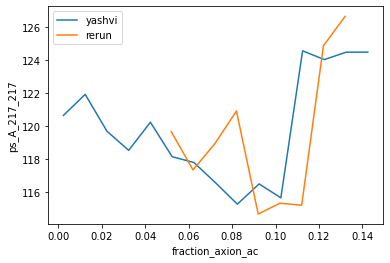

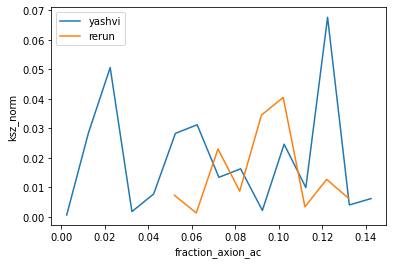

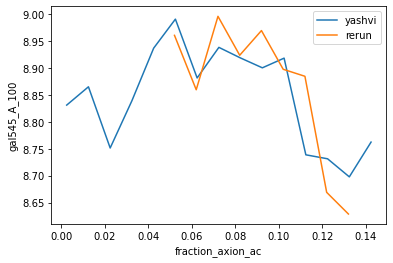

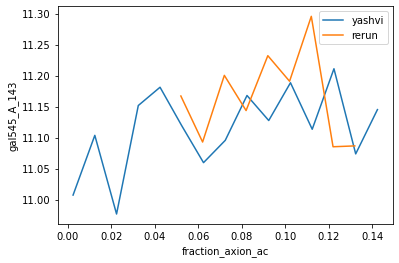

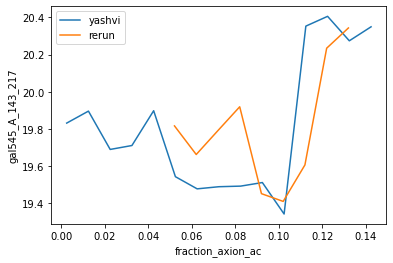

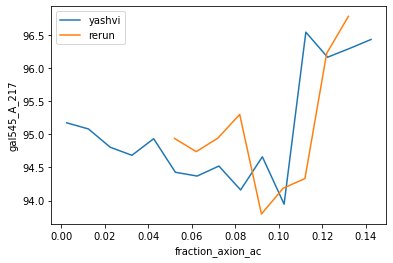

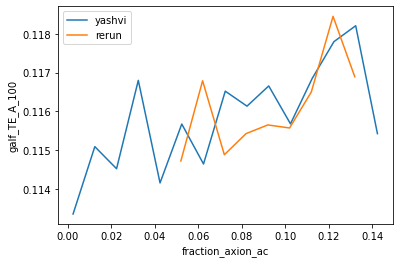

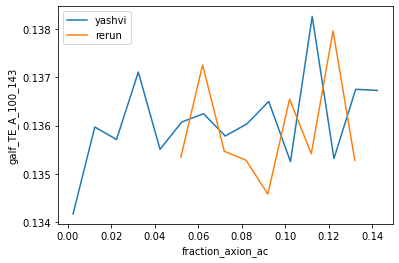

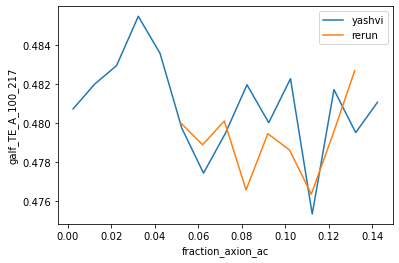

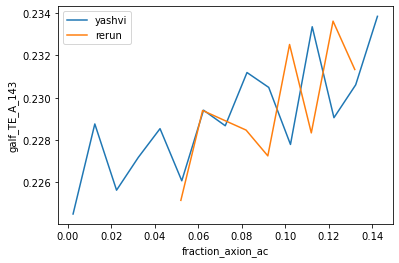

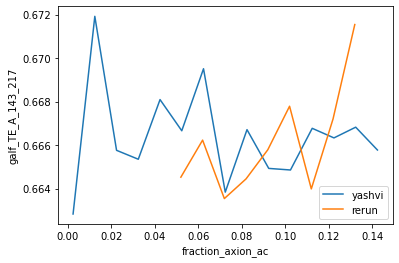

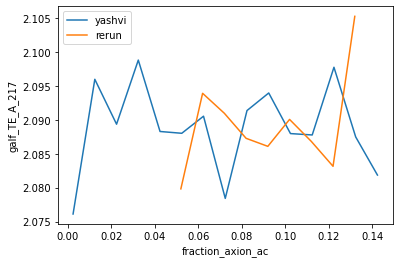

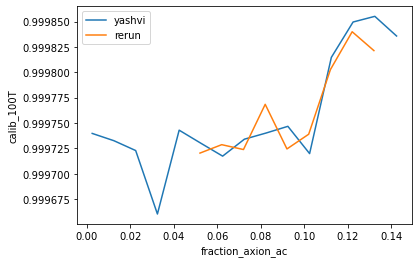

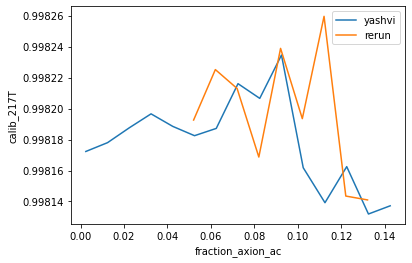

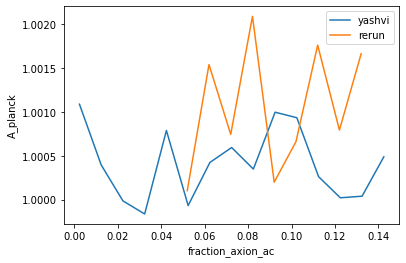

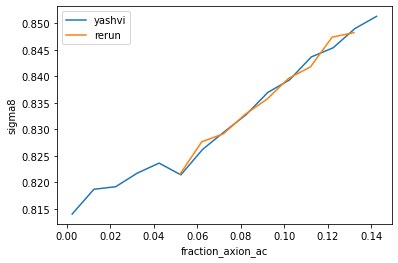

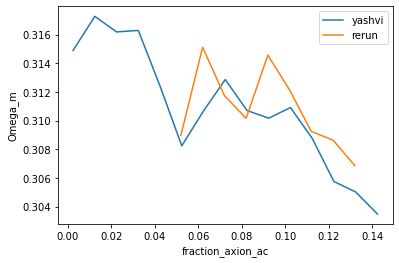

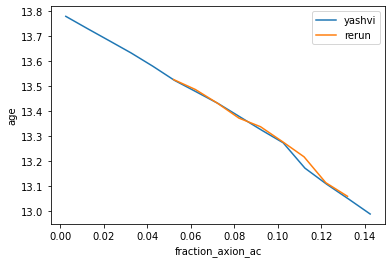

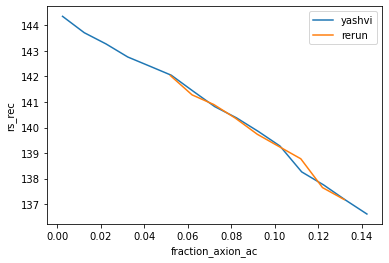

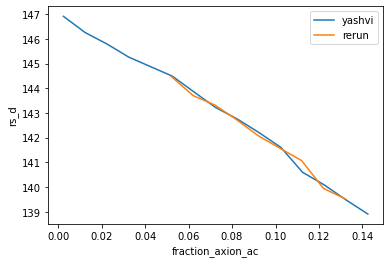

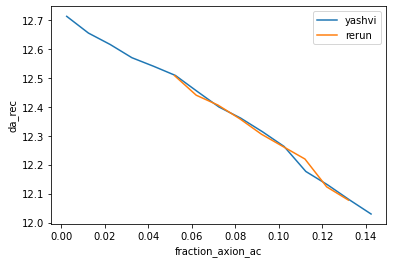

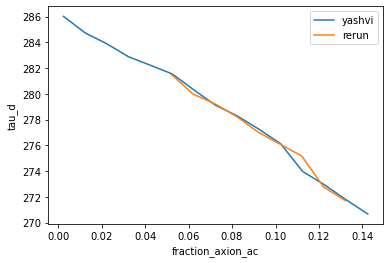

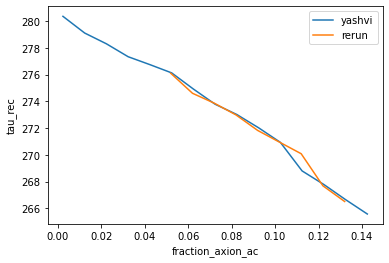

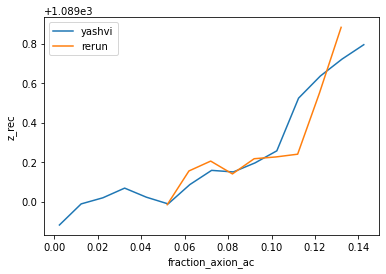

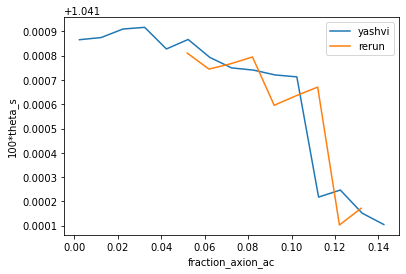

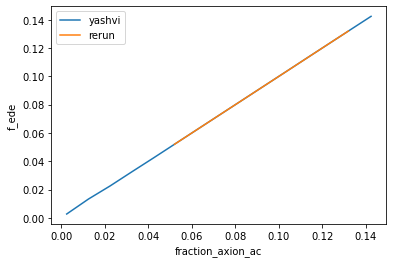

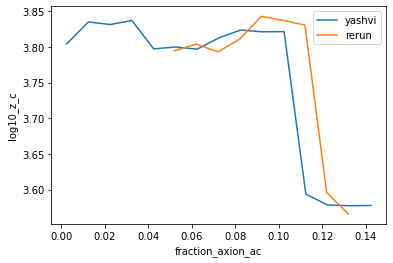

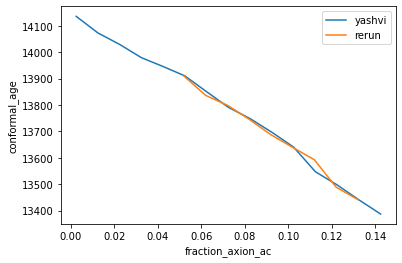

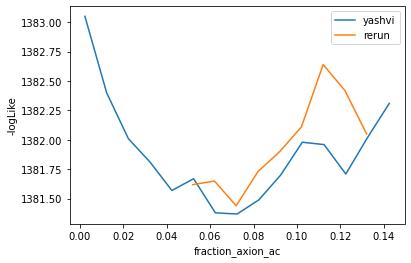

In [13]:
for param in yashvi.param_order:
    yx = yashvi_output[yashvi.prof_param]
    yy = yashvi_output[param]
    rx = rerun_output[rerun.prof_param]
    ry = rerun_output[param]
    
    plt.plot(yx, yy, label="yashvi")
    plt.plot(rx, ry, label="rerun")

    plt.ylabel(param)
    plt.xlabel(yashvi.prof_param)
#     plt.xlim([min(x), max(x)])
#     plt.ylim([min(y), max(y)])
    plt.legend()
    plt.show()

### Check $\chi^2$ of Yashvi's runs

In [18]:
# create .bestfit file to run MP on to get chi2 per experiment 

# get dictionary of params 
evaluate_cosmo = {}
loc = 13
for key in lcdm.param_order:
    evaluate_cosmo[key] = deepcopy(lkl_prof_output[key][loc])
    
evaluate_cosmo;

In [19]:
evaluate_cosmo['f_ede']

0.1224888

In [20]:
# write as new bf file
evaluate_MP_point_file = lcdm.chains_dir+'evaluate_MP_point.txt'
with open(evaluate_MP_point_file, 'w') as eval_file:
    eval_file.write("#        ")
    for param in lcdm.param_order:
        eval_file.write("{s},    ".format(s=param))
    eval_file.write("\n")
    for param in lcdm.param_order:
        eval_file.write("{:.6e}    ".format(evaluate_cosmo[param]))

In [21]:
run_command = "mpirun -np {procs} MontePython.py run -p {param} -o {output} -b {bf}  -f {f} --display-each-chi".format(
    procs=lcdm.processes,
    param=lcdm.chains_dir+'log.param', 
    output=lcdm.chains_dir,
    bf=evaluate_MP_point_file, 
    f = 0., 
)

In [22]:
run(run_command, shell=True)
print(evaluate_cosmo['-logLike'])

 /!\ Appending to an existing folder: using the log.param instead of
     /home2/karwal/lkl_prof/Yashvi_non_parabolic_chi2/log.param
Running Monte Python v3.5.0

 /!\ Your code location in the log.param file is in contradiction with your
     .conf file. I will use the one from log.param.
with CLASS v2.9.4
 /!\ CLASS set to version 8b6aceabc2471195f295fd59ea53a9a82ae962ca, wrt. the one
     used in the log.param: 24152e700f86f4e36a26729bf9a0b111d9c1cb43.

Testing likelihoods for:
 ->Planck_highl_TTTEEE, Planck_lowl_EE, Planck_lowl_TT

----
clik version plc_3.1
  smica
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/hi_l/plik/plik_rd12_HM_v22b_TTTEEE.clik' on test data. got -1172.47 expected -1172.47 (diff -4.34055e-07)
----
Initializing SimAll
----
clik version plc_3.1
  simall simall_EE_BB_TE
Checking likelihood '/home2/karwal/likelihoods/code/planck/code/plc_3.0/plc-3.1/../../../baseline/plc_3.0/low_l/simall/simall_100x143_off

-> for  Planck_highl_TTTEEE :  loglkl= -1172.9223824501023 ,  chi2eff= 2345.8447649002046
-> for  Planck_lowl_EE :  loglkl= -198.31087545107673 ,  chi2eff= 396.62175090215345
-> for  Planck_lowl_TT :  loglkl= -10.562264953706944 ,  chi2eff= 21.124529907413887
-> Total:  loglkl= -1381.795522854886 ,  chi2eff= 2763.591045709772
1  1381.8	2.277729e+00	1.329525e-01	7.151522e-01	3.072162e+00	9.896580e-01	5.748462e-02	2.742045e+00	1.224469e-01	-3.578623e+00	4.330898e+01	9.363836e-01	7.077370e+00	2.488578e+02	5.033150e+01	5.765965e+01	1.240492e+02	6.758484e-02	8.731396e+00	1.121111e+01	2.040570e+01	9.616253e+01	1.178002e-01	1.353163e-01	4.817116e-01	2.290586e-01	6.663328e-01	2.097788e+00	9.998497e+02	9.981625e+02	1.000022e+00	8.447962e-01	3.057500e-01	1.310740e+01	1.377553e+02	1.400855e+02	1.213039e+01	2.729488e+02	2.677778e+02	1.089636e+03	1.041248e+00	1.224885e-01	3.578527e+00	1.349761e+04	
1381.71


### Rerun lkl prof 

In [23]:
rerun = lkl_prof('/home2/karwal/lkl_prof/Yashvi_non_parabolic_chi2/planck_fede/', 'planck_fede', 'fraction_axion_ac')
# if you don't have MCMC chains, ensure that the info_root (the second argument) is the same as the folder name, as shown in this example.
# also ensure that the .bestfit and .covmat files you have are named <info_root>.bestfit and <info_root>.covmat

In [24]:
rerun.prof_incr = 0.01 # run two separate jobs with both a + increment and a - increment
rerun.prof_max = 0.14
rerun.prof_min = 0.01
rerun.processes = 1

In [25]:
rerun.global_min(run_glob_min=False, N_min_steps=10);
# lcdm.global_ML = get_MP_bf_dict(lcdm.chains_dir+'planck_fede/planck_fede.bestfit')
# lcdm.param_order = read_header_as_list(lcdm.chains_dir+'planck_fede_+fraction_axion_ac_lkl_profile.txt')

check_global_min: Found minimum with file name planck_fede
match_param_names: Params match - the recorded params contain the same params as param_names passed. 


In [26]:
print("Global minimum:")
print(rerun.global_ML)

Global minimum:
{'omega_b': 0.02262609, 'omega_cdm': 0.1242533, 'h': 0.6909933, 'ln10^{10}A_s': 3.052278, 'n_s': 0.9795191, 'tau_reio': 0.05539626, 'scf_parameters__1': 2.931837, 'fraction_axion_ac': 0.05202657, 'log10_axion_ac': -3.795181, 'A_cib_217': 47.72671, 'xi_sz_cib': 0.3632496, 'A_sz': 7.272315, 'ps_A_100_100': 253.74, 'ps_A_143_143': 47.63453, 'ps_A_143_217': 46.82874, 'ps_A_217_217': 119.6834, 'ksz_norm': 0.007241073, 'gal545_A_100': 8.960738, 'gal545_A_143': 11.16717, 'gal545_A_143_217': 19.81652, 'gal545_A_217': 94.93781, 'galf_TE_A_100': 0.1147175, 'galf_TE_A_100_143': 0.1353448, 'galf_TE_A_100_217': 0.4800059, 'galf_TE_A_143': 0.2251487, 'galf_TE_A_143_217': 0.6645263, 'galf_TE_A_217': 2.079834, 'calib_100T': 0.9997204, 'calib_217T': 0.9981926, 'A_planck': 1.000103, 'sigma8': 0.8215245, 'Omega_m': 0.3089679, 'age': 13.52566, 'rs_rec': 142.0351, 'rs_d': 144.4779, 'da_rec': 12.50796, 'tau_d': 281.5191, 'tau_rec': 276.1042, 'z_rec': 1088.984, '100*theta_s': 1.041811, 'f_ede

In [32]:
re_lkl_prof_output = rerun.full_lkl_prof_dict()

In [34]:
x = re_lkl_prof_output['f_ede']
y = re_lkl_prof_output['-logLike']

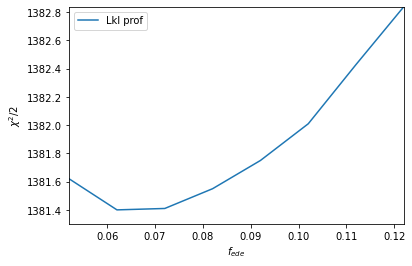

In [35]:
plt.plot(x, y, label="Lkl prof")

plt.ylabel(r'$\chi^2/2$')
plt.xlabel(r'$f_{ede}$')
plt.xlim([min(x), max(x)])
plt.ylim([min(y)-0.1, max(y)])
plt.legend()
plt.show()